# <b>Telecom Churn Prediction (Machine learning)</b>
### <b>Ateendra Jha</b>

## Problem Statement 
* In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. 
* In this project, We will define high-value customers based on a certain metric (mentioned later below) and predict churn on high-value customers.
* Our goal is to predict which customers are at high risk of churn.
## business objective and the data
* The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
* The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
## customer behaviour during churn
* In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## Assignment sections

The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Exploratory Data analysis
4. Data preparation
5. Model building and evaluation
6. Summary 
7. Conclusion

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
%matplotlib inline


# 1. Data understanding and exploration

In [2]:
# Ignore  warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data file
tcd= pd.read_csv('telecom_churn_data.csv')
tcd.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
tcd.shape

(99999, 226)

In [5]:
tcd.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [6]:
tcd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Check the descriptive statistics of numeric variables
tcd.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# 2. Data cleaning
 - Null values
 - Drop unnecessary rows and column
 - Imputing unnecessary rows and column

In [8]:
#checking percentage of null values in each column

round(100*(tcd.isna().sum()/len(tcd.index)), 2).sort_values(ascending=False).head(40) [tcd.isna().sum() > 0]

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

* It is advisable to drop the columns having null values more than 70% but here in this case we will not prefer to drop the columns at this stage to prevent any loss of data which will assit us to decide the high value customers. 
* First aim is to check that either the null value is in the recharge amount and recharge date for the same index. if so then we can just impute 0 in that.

In [9]:
# Checking and imputing for 6th month
Null_rech_6_index = tcd['total_rech_data_6'].isnull()
date_Null_rech_6_index = tcd['date_of_last_rech_data_6'].isnull()
if Null_rech_6_index.equals(date_Null_rech_6_index):
    tcd['total_rech_data_6'].fillna(0, inplace=True)
    tcd['av_rech_amt_data_6'].fillna(0, inplace=True)
#Checking and imputing for 7th month
Null_rech_7_index = tcd['total_rech_data_7'].isnull()
date_Null_rech_7_index = tcd['date_of_last_rech_data_7'].isnull()
if Null_rech_7_index.equals(date_Null_rech_7_index):
    tcd['total_rech_data_7'].fillna(0, inplace=True)
    tcd['av_rech_amt_data_7'].fillna(0, inplace=True)
# Checking and imputing for 8th month
Null_rech_8_index = tcd['total_rech_data_8'].isnull()
date_Null_rech_8_index = tcd['date_of_last_rech_data_8'].isnull()
if Null_rech_8_index.equals(date_Null_rech_8_index):
    tcd['total_rech_data_8'].fillna(0, inplace=True)
    tcd['av_rech_amt_data_8'].fillna(0, inplace=True)

* Now we can drop the columns NA more than 70%

In [10]:
# Recheck the the columns having null values more than 70%

(((tcd.isnull().sum()/ len(tcd)) * 100) >= 70).sum()

34

In [11]:
# We can bring out a new variable for analysis.
# Total Amount for data recharge can be calculated by multiplying average amount spent on data regarge and data recharged 
tcd['total_data_amt_6'] = tcd['total_rech_data_6'] * tcd['av_rech_amt_data_6']
tcd['total_data_amt_7'] = tcd['total_rech_data_7'] * tcd['av_rech_amt_data_7']
tcd['total_data_amt_8'] = tcd['total_rech_data_8'] * tcd['av_rech_amt_data_8']
tcd['total_data_amt_9'] = tcd['total_rech_data_9'] * tcd['av_rech_amt_data_9']

In [12]:
# on the basis of good phase that is 6th an 7th month define the high valued customer.
Combine_amount_6_7 = tcd[['total_data_amt_6','total_data_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

HV_70th_percentile = np.percentile(Combine_amount_6_7, 70)

print("70th percentile is - ", HV_70th_percentile)

70th percentile is -  239.0


### high valued customers 

In [13]:
# As per business goals - high valued customers should be target. 
# finding high valued customers
tcd = tcd[Combine_amount_6_7 >= HV_70th_percentile]

In [14]:
# check the data left with us for analysis
tcd.shape

(30001, 230)

In [15]:
tcd.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_6,total_data_amt_7,total_data_amt_8,total_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


In [16]:
# resetting the indesh
tcd = tcd.reset_index(drop=True)

In [17]:
tcd.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_6,total_data_amt_7,total_data_amt_8,total_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


In [18]:
# Volume base cost column are in different format. 
# it is better to have those columns in same format of month in terms of 6,7,8 and 9
tcd.rename(columns = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace=True)


### Now we will mark the churn customers
##### Churn : 1
##### Not Churn : 0

* This will be on the basis of the 9th month data , if incoming, outgoing and data usage all are zero then those custumers wiol be sonsidered as churned. 


In [19]:
# Marking Churnn

tcd['churn'] = tcd.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and (x.total_og_mou_9 == 0) and 
                        (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [20]:
tcd['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [21]:
# Creating dataframe for the feature used to decide churn
churn_df = tcd[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_df.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


### If we compare first five data we can say that our mappung is correct

In [22]:
# As mapping has been done now its time to remove the 9th month data. 
tcd.drop([col for col in tcd.columns if '_9' in col], axis=1, inplace = True)


In [23]:
# lets have look to shape again
tcd.shape

(30001, 175)

In [24]:
# Checking prcentage of missing values now
round(100*(tcd.isna().sum()/len(tcd.index)), 2).sort_values(ascending=False).head(40) [tcd.isna().sum() > 0]

fb_user_8                   46.83
count_rech_3g_8             46.83
arpu_2g_8                   46.83
count_rech_2g_8             46.83
date_of_last_rech_data_8    46.83
max_rech_data_8             46.83
arpu_3g_8                   46.83
night_pck_user_8            46.83
arpu_2g_6                   44.15
date_of_last_rech_data_6    44.15
night_pck_user_6            44.15
arpu_3g_6                   44.15
max_rech_data_6             44.15
count_rech_2g_6             44.15
fb_user_6                   44.15
count_rech_3g_6             44.15
date_of_last_rech_data_7    43.15
night_pck_user_7            43.15
fb_user_7                   43.15
max_rech_data_7             43.15
arpu_3g_7                   43.15
arpu_2g_7                   43.15
count_rech_3g_7             43.15
count_rech_2g_7             43.15
loc_ic_t2f_mou_8             3.91
isd_og_mou_8                 3.91
std_og_t2f_mou_8             3.91
std_og_t2c_mou_8             3.91
ic_others_8                  3.91
std_og_mou_8  

In [25]:
# Columns with at least 40% missing data
cols_40_percent_missing_data = ((tcd.isnull().sum()/ len(tcd)) * 100) >= 40
cols_40_percent_missing_data = cols_40_percent_missing_data[cols_40_percent_missing_data > 0.40].index
cols_40_percent_missing_data


Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [26]:
# As date can be imputed, and about 50% data is not available so better to drop 
tcd.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)


In [27]:
# Left columns for max_rech_data_6, max_rech_data_7' & max_rech_data_8 lets see the statitstical parameters
for i in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    print(i)
    print("-------------------------------")
    print(tcd[i].describe())
    print('-------------------------------------')
    print("NULL values : ", tcd[i].isnull().sum())
    print('-------------------------------------')
    print('-------------------------------------')



max_rech_data_6
-------------------------------
count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
NULL values :  13245
-------------------------------------
-------------------------------------
max_rech_data_7
-------------------------------
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
NULL values :  12944
-------------------------------------
-------------------------------------
max_rech_data_8
-------------------------------
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max 

In [28]:
# as all have minimum value upto 1 so we can say that null values are those who have not recharged which can be taken as 0 amount
# Imput the missing data by 0
for i in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    tcd[i].fillna(0, inplace=True)

In [29]:
# Checking the other columns in list 
for i in ['_6', '_7','_8']:
    print ('For the month : ', i)
    for j in ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
        'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 
        'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']:
        if i in j :
            print(tcd[[j]].isna().sum()) 
    print('--------------------------')

For the month :  _6
count_rech_2g_6    13245
dtype: int64
count_rech_3g_6    13245
dtype: int64
arpu_3g_6    13245
dtype: int64
arpu_2g_6    13245
dtype: int64
night_pck_user_6    13245
dtype: int64
--------------------------
For the month :  _7
count_rech_2g_7    12944
dtype: int64
count_rech_3g_7    12944
dtype: int64
arpu_3g_7    12944
dtype: int64
arpu_2g_7    12944
dtype: int64
night_pck_user_7    12944
dtype: int64
--------------------------
For the month :  _8
count_rech_2g_8    14048
dtype: int64
count_rech_3g_8    14048
dtype: int64
arpu_3g_8    14048
dtype: int64
arpu_2g_8    14048
dtype: int64
night_pck_user_8    14048
dtype: int64
--------------------------


### From above output we can see that for a month all the null values are same so there may be possibility that it might be missing for a perticular index for that month
### We can also see that 8th month have higher missing value.
### Also we can infere that these columns missing value means they might have stopped the service means that the value can be imputed with zero

In [30]:
columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tcd[columns_to_impute] = tcd[columns_to_impute].fillna(0)

### Variance and Uniqensss 

In [31]:
# Now lets have a look to the columns having all same value or we can say 0 variance. As these column will be of no use for the analysis.
columns_0_variance = tcd.var() == 0
column_name_0_variance = columns_0_variance[columns_0_variance == 1].index
print(column_name_0_variance)
print("Total columns with no variance : ", columns_0_variance.sum())

print("------------------------------------------------------------------------------")
columns_1_unique = tcd.nunique() == 1
column_name_1_unique = columns_1_unique[columns_1_unique == 1].index
print(column_name_1_unique)
print("Total columns with only ONE unique value : ", columns_1_unique.sum())


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')
Total columns with no variance :  10
------------------------------------------------------------------------------
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')
Total columns with only ONE unique value :  13


In [32]:
# droping the non Date columns
tcd.drop(column_name_0_variance, axis=1, inplace = True)


In [33]:
Any_NA_columns = tcd.columns[tcd.isna().any()].tolist()
Any_NA_columns

['last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic

In [34]:
# Checking for above columns
for i in ['_6', '_7','_8']:
    print('-------------------------')
    print ('For the month : ', i)
    col_list = []
    for j in Any_NA_columns:
        if i in j:
            col_list.append(j)
    print(tcd[col_list].info())

-------------------------
For the month :  _6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  flo

#### Here also we can say that by the 8th moth the number of missing value has increased . That shows that service has been stopped so we can impute 0 

In [35]:
# impute the missing values from the above columns with 0.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in Any_NA_columns:
    if "date_of_last_rech" not in column:
        tcd[column].fillna(0, inplace=True)

In [36]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

tcd[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  30001 non-null  object
 5   last_date_of_month_8  30001 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [37]:
# No use of date column during the analysis.
tcd.drop(date_columns, axis=1, inplace = True)

In [38]:
# Check missing values again
round(100*(tcd.isna().sum()/len(tcd.index)), 2).sort_values(ascending=False).head(40) [tcd.isna().sum() > 0]

Series([], dtype: float64)

## No missing values left

In [39]:
pd.set_option('max_columns', None)
tcd.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_amt_6,total_data_amt_7,total_data_amt_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43

In [40]:
for i in ['arpu_6',	'arpu_7',	'arpu_8']:
    print(tcd[i].describe())

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64


In [41]:
tcd = tcd[(tcd.arpu_6 > 0) & (tcd.arpu_7 > 0) & (tcd.arpu_8 > 0)]
tcd.shape

(28553, 156)

In [42]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

tcd.drop(individual_cols, axis = 1, inplace = True)

In [43]:
tcd.shape

(28553, 105)

# 3. Exploratory Data Analysis

In [44]:
#  Statistical summary

tcd.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_amt_6,total_data_amt_7,total_data_amt_8,churn
count,2.855300e+04,28553.00000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.00000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000,28553.000000
mean,7.001212e+09,561.21853,572.291169,528.383696,263.078435,273.984997,243.553904,375.613558,386.009558,347.484808,16.275988,12.896419,12.965625,26.770018,20.426879,20.698114,260.051553,263.607033,246.038069,345.235956,369.220780,317.871502,2.049537,2.095217,1.998898,5.830561,7.187271,6.794935,0.663828,0.044774,0.060528,613.840562,642.163171,572.771776,236.260258,241.941876,233.229300,47.382340,50.375400,46.242808,295.673165,305.974691,292.145942,0.062016,0.019885,0.027321,10.798947,12.087321,11.369654,1.161385,1.542509,1.269273,11.897559,11.909992,10.313978,663.322733,673.410395,607.633103,169.27083,173.190313,165.923301,1.657514,1.868035,1.678142,77.180611,79.972577,74.514412,1.236648,1.409834,1.251917,0.420866,0.458201,0.426225,126.567942,126.865966,109.483711,339.432433,371.571372,360.217886,0.013694,0.012783,0.011733,0.177459,0.188246,0.159773,1.059188,1.221588,1.092144,0.212762,0.229223,0.216545,0.208104,0.228978,0.209680,0.517529,0.528561,0.492768,1230.594088,173.565683,180.504783,158.435608,450.366201,533.449601,478.440009,0.057682
std,6.887386e+05,449.76156,479.956450,499.893178,457.422268,483.693939,464.096538,474.137517,498.910926,480.456575,75.790864,77.090440,75.578209,116.227194,97.418900,107

### Checking the uniquness in the customer list 

In [45]:
len(tcd.mobile_number.unique()) == len(tcd)

True

In [46]:
# No use mobile_number column so we can drop it now
tcd.drop(['mobile_number'], axis=1, inplace = True)

In [47]:
tcd.shape

(28553, 104)

## It is good to check the balance in data

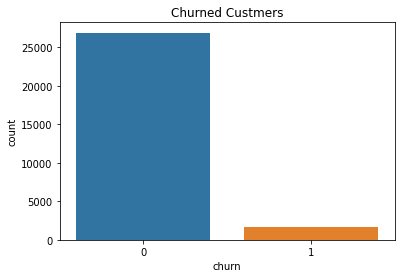

Churned customer :  1647
Not Churned customer :  26906
Percentage Diffrence :  88.46 %
Proportion of Churned to Not Churned = 6.12%


In [48]:
sns.countplot(tcd.churn)
plt.title('Churned Custmers')
plt.show()
print ('Churned customer : ',len(tcd[(tcd.churn ==1)]))
print ('Not Churned customer : ',len(tcd[(tcd.churn == 0)]))
print('Percentage Diffrence : ', round(abs((100*len(tcd[(tcd.churn ==1)])/len(tcd)) - 100*len(tcd[(tcd.churn ==0)])/len(tcd)),2),'%')
print (f'Proportion of Churned to Not Churned = {100* len(tcd[(tcd.churn ==1)])/len(tcd[(tcd.churn ==0)]):.2f}%' )

#### We can observe that dataset is imbalanced. We need to handle this. We will do it in later stage.


## Univariate analysis of categoprical data


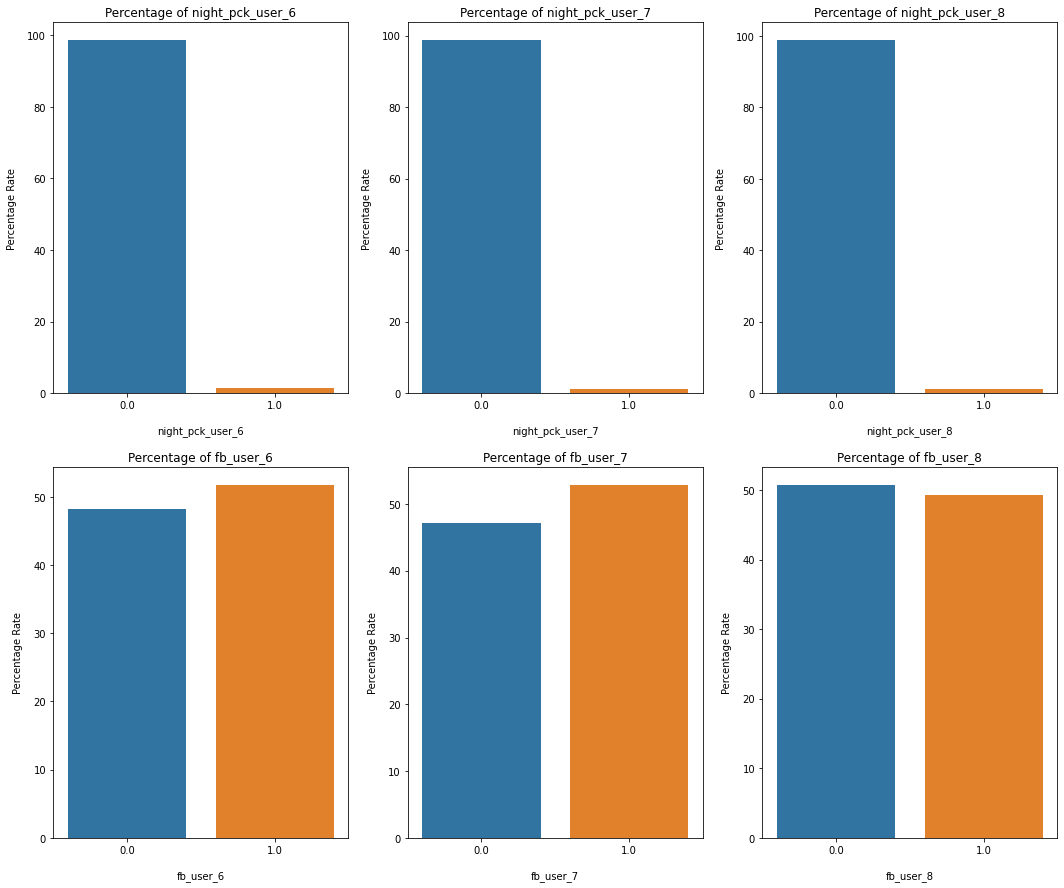

In [49]:
# Categorical fetures list 
cat_features = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
subplot_loc = 1
plt.figure(figsize = (18,15))
for i in cat_features:
    Col_value = round(((tcd[i].value_counts(dropna = False))/(len(tcd[i])) * 100), 2)
    plt.subplot(2, 3, subplot_loc)
    ax = sns.barplot(x = Col_value.index, y = Col_value.values, order = Col_value.sort_index().index)
    plt.xlabel(i, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)
    plt.title('Percentage of '+i)
    subplot_loc += 1

### From univariate analysis we can imterprete that byt the month of 8th night_pack users as well as fb_users has rudeced. This might be indication of disloyalty to the service.

# Bivariate Analysis

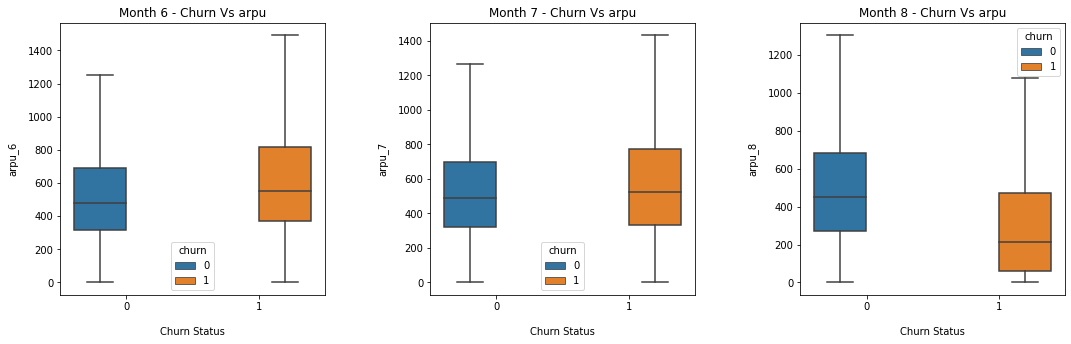

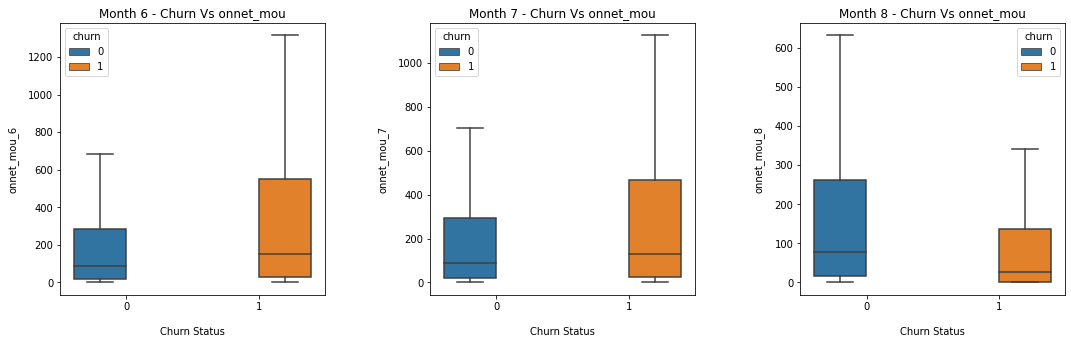

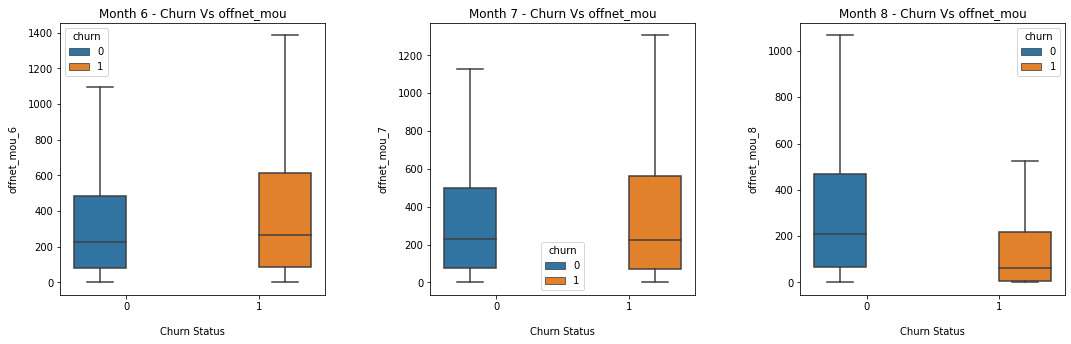

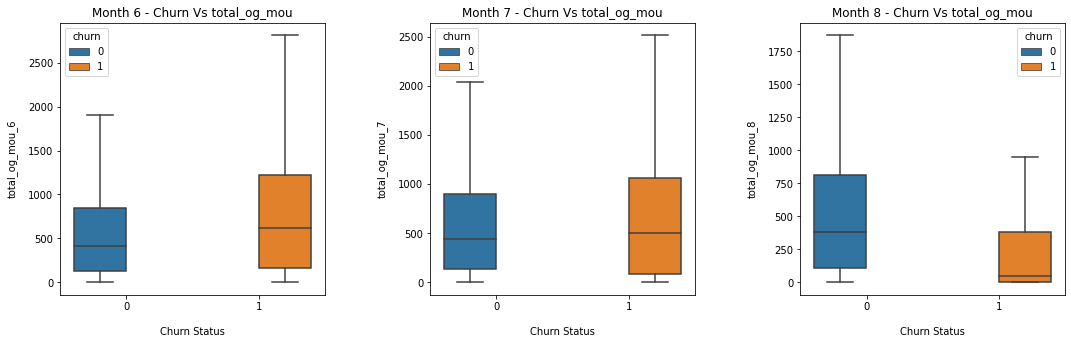

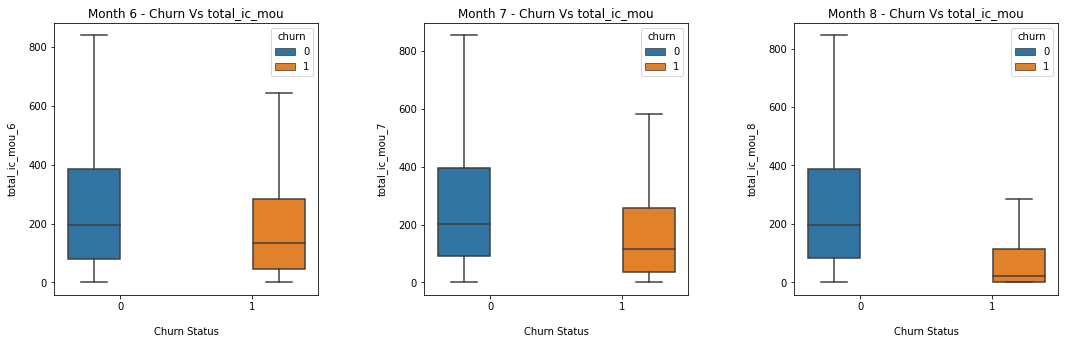

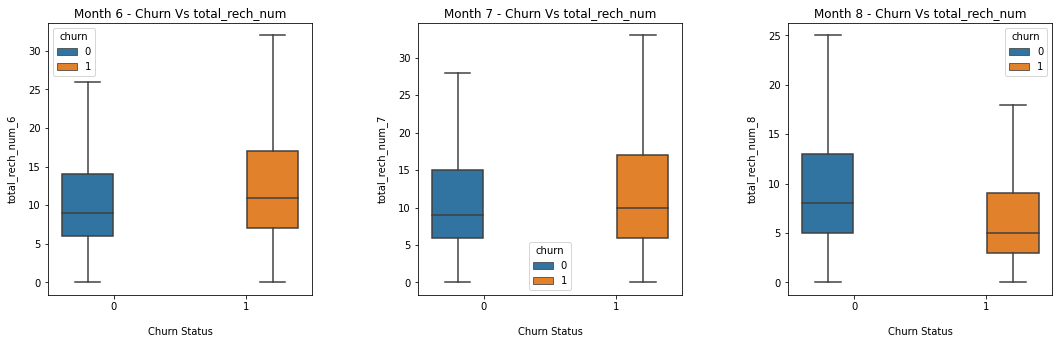

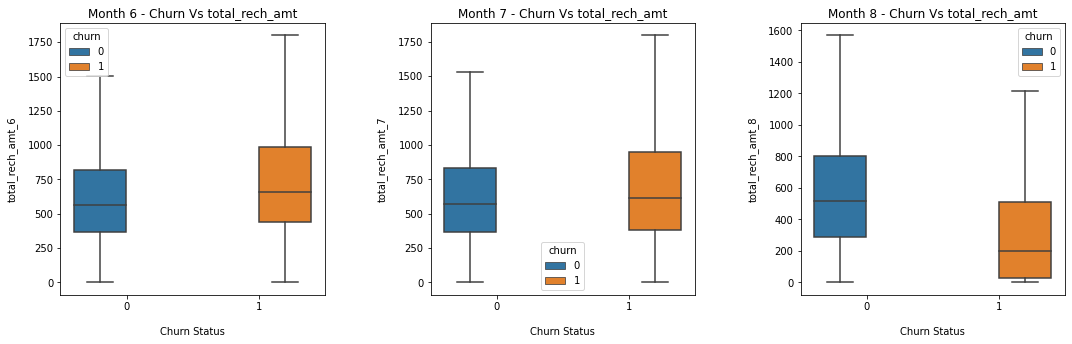

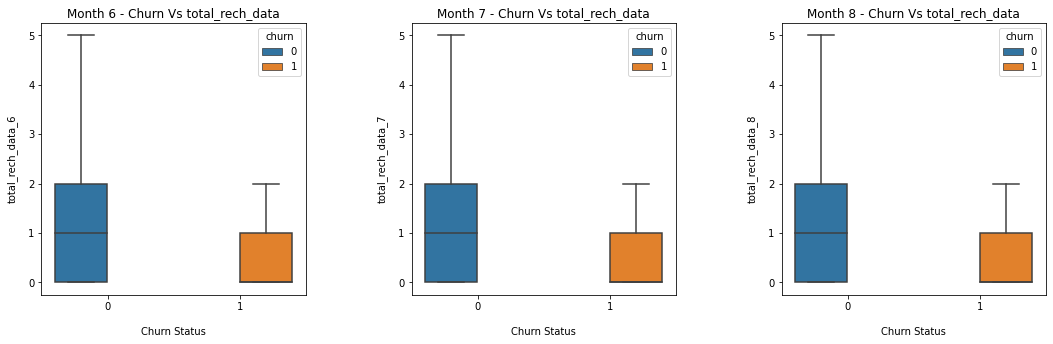

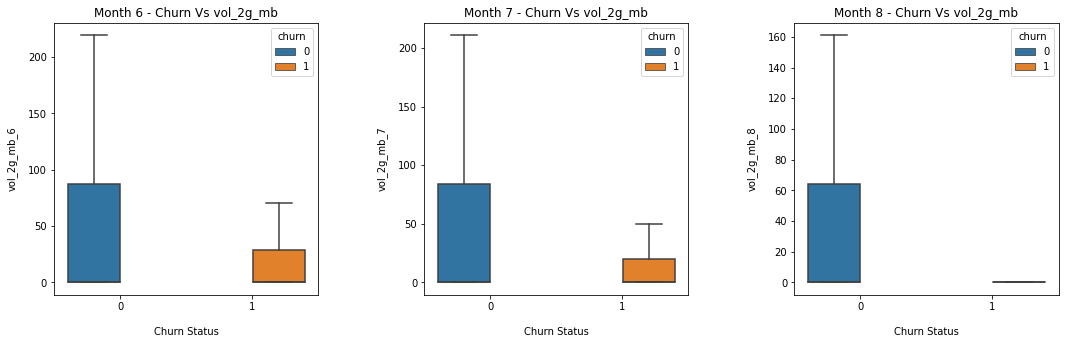

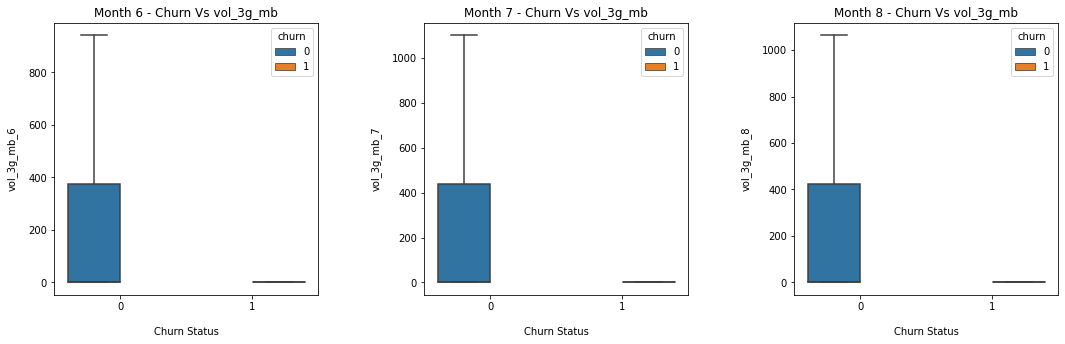

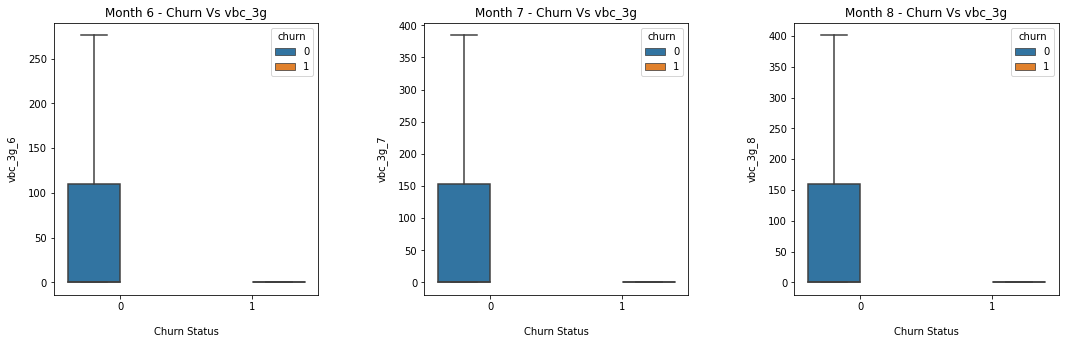

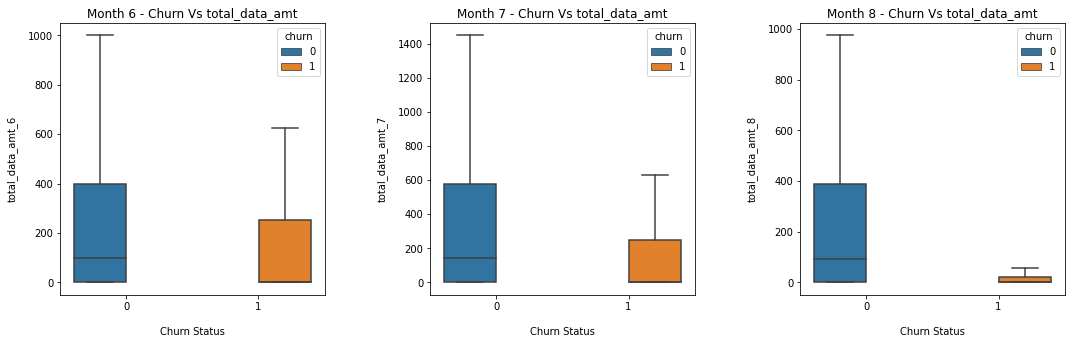

In [50]:
# Bivariate Analysis
# Defining and ploting
def bivariate(y_axis):
    plt.figure(figsize = (18, 5))
    xlabel = "Churn Status"
    x_axis = "churn"
    plot_title_1 = "Month 6 - Churn Vs " + y_axis
    plot_title_2 = "Month 7 - Churn Vs " + y_axis
    plot_title_3 = "Month 8 - Churn Vs " + y_axis
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = tcd, showfliers = False)
    plt.title(plot_title_1)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(( y_axis + "_6"), labelpad = 10)
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = tcd, showfliers = False)
    plt.title(plot_title_2)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(( y_axis + "_7"), labelpad = 10)
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = tcd, showfliers = False)
    plt.title(plot_title_3)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(( y_axis + "_8"), labelpad = 10)
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
for i in ["arpu" ,"onnet_mou","offnet_mou","total_og_mou","total_ic_mou","total_rech_num","total_rech_amt",
                "total_rech_data","vol_2g_mb","vol_3g_mb","vbc_3g","total_data_amt"]:
                bivariate(i)

#### We can clearly see the huge drop in uses in 8th Month.

In [51]:
tcd.shape

(28553, 104)

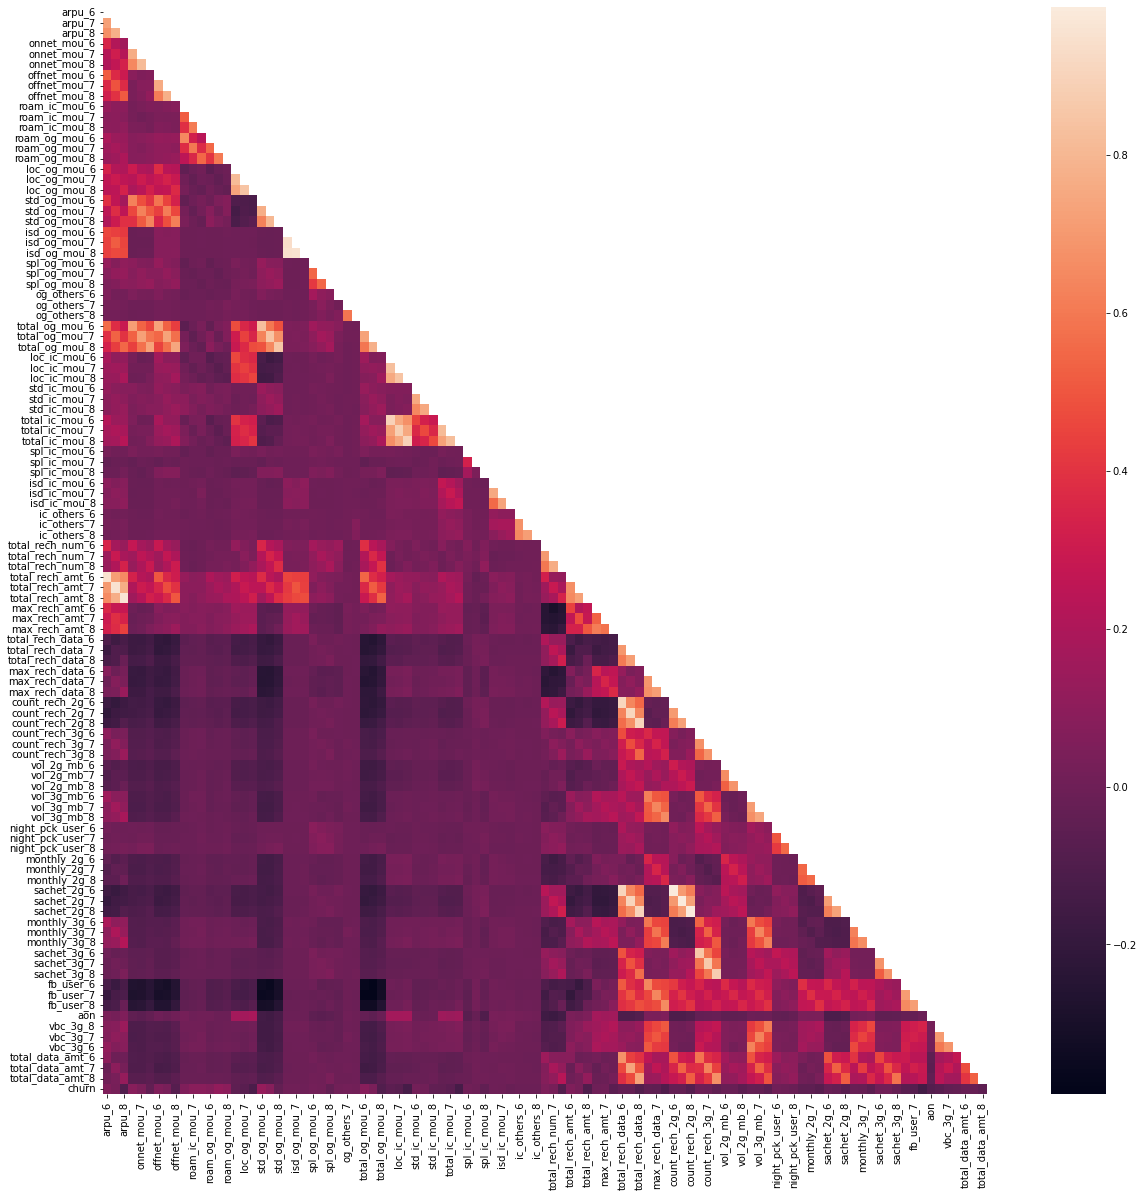

Highly correlated Features , >80%
['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'm

In [52]:
# Plotting Correlation Heatmap
plt.figure(figsize=[20,20])
sns.heatmap(tcd.corr(), mask= np.triu(tcd.corr()))
plt.show()
#Highly Correlated features list
High_corr = tcd.corr().loc[np.where(tcd.corr()>0.8, 1, 0)==1].columns
High_corr_list = []
for i in High_corr:
    High_corr_list.append(i)
print('Highly correlated Features , >80%')
print(High_corr_list)

In [53]:
# Creating Good Phase and Action Phase data 
def good_action_phase(df, var):
    col_6 = var + "_6"
    col_7 = var + "_7"
    col_8 = var + "_8"
    good_phase_col = var + "_good_phase"
    action_phase_col = var + "_action_phase"
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    return df

In [54]:
# Derive Good and Action Phase Variables

for i in ["arpu","onnet_mou","offnet_mou",'roam_ic_mou', "roam_og_mou", "loc_og_mou", "std_og_mou", "isd_og_mou", "spl_og_mou", "og_others",
                        "total_og_mou", "loc_ic_mou", "std_ic_mou", "spl_ic_mou", "isd_ic_mou", "ic_others", "total_ic_mou", "total_rech_num",
                        "total_rech_amt", "max_rech_amt", "total_rech_data", "max_rech_data", "count_rech_2g", "count_rech_3g", "vol_2g_mb", 
                        "vol_3g_mb", "monthly_2g", "sachet_2g", "monthly_3g", "sachet_3g", "vbc_3g", "total_data_amt"]:
                        tcd= good_action_phase(tcd, i)
tcd.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_amt_good_phase,total_data_amt_action_phase
0,0.0,0.0,0.0,1.0,1.0,1.0,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,0.0,0.0,0.0,0.0,0.0,0.0,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


## Checking outliers

In [55]:
Good_nume_var = [i for i in tcd.columns if 'good' in i]
Act_NUM_var = [i for i in tcd.columns if 'action' in i ]

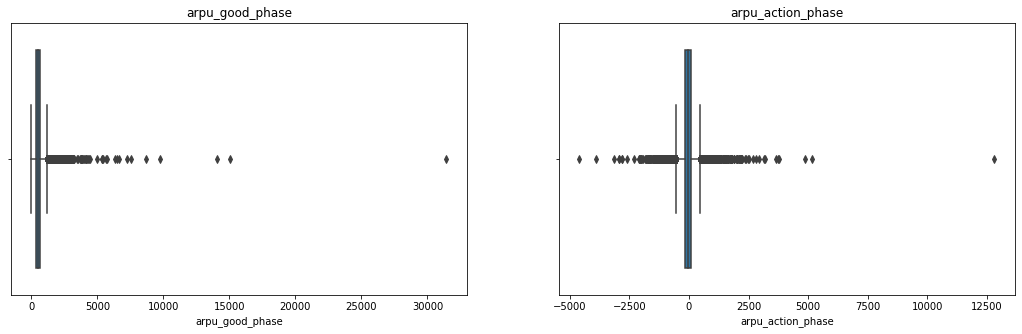

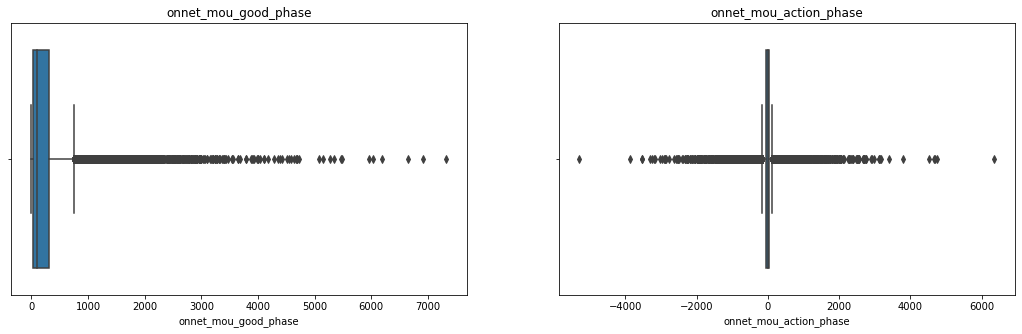

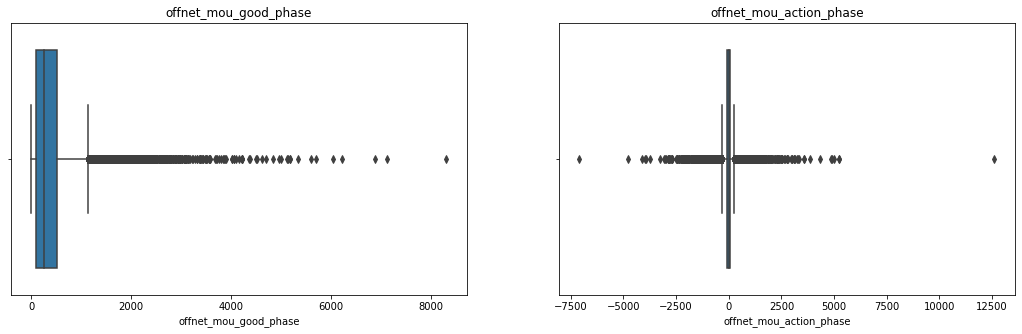

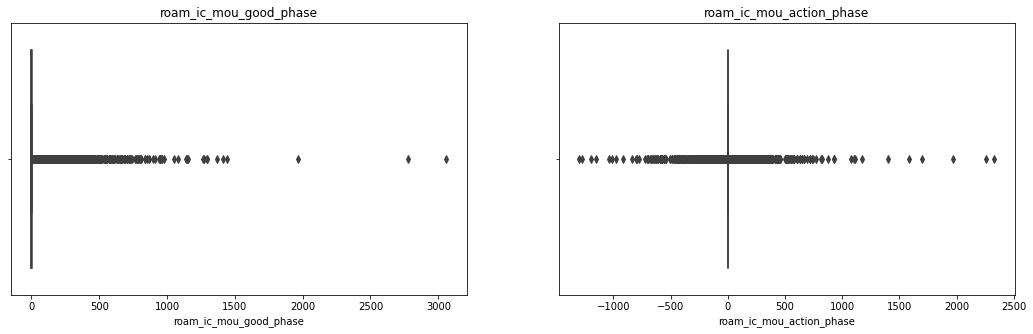

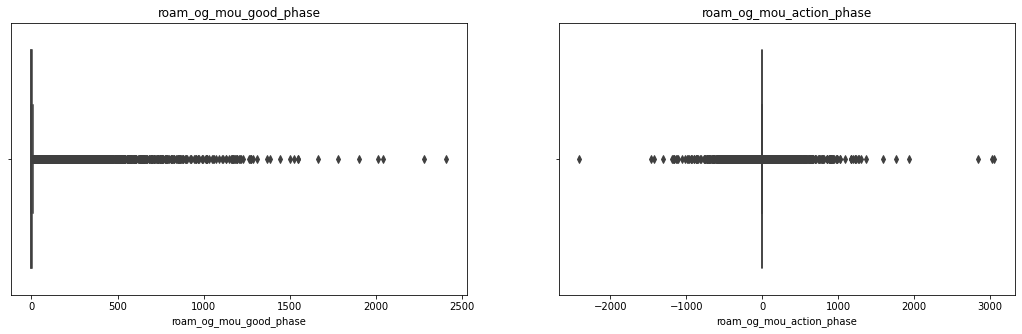

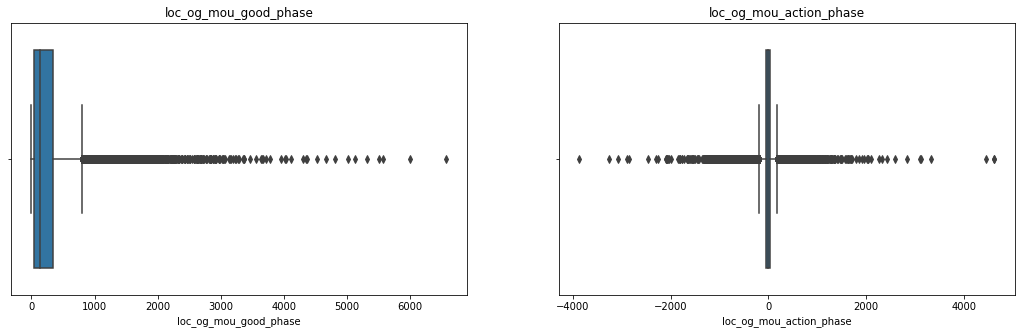

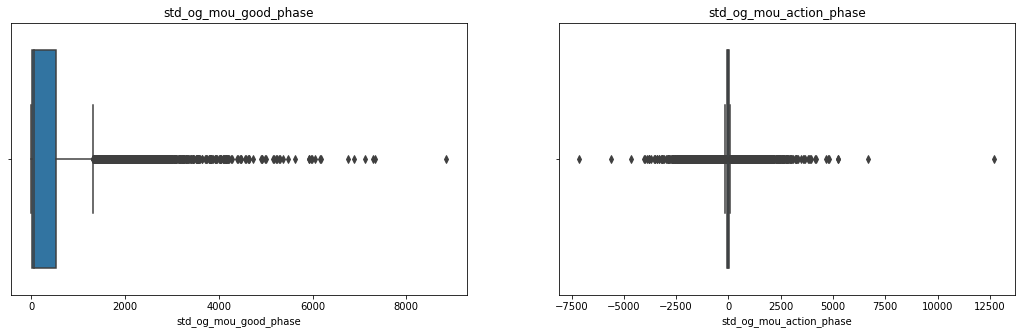

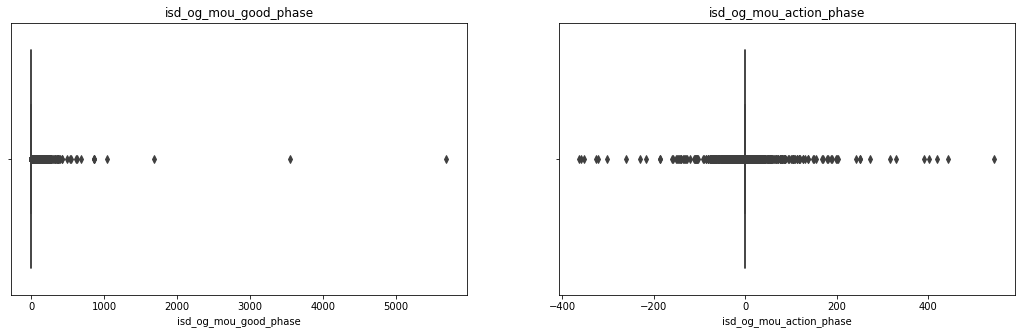

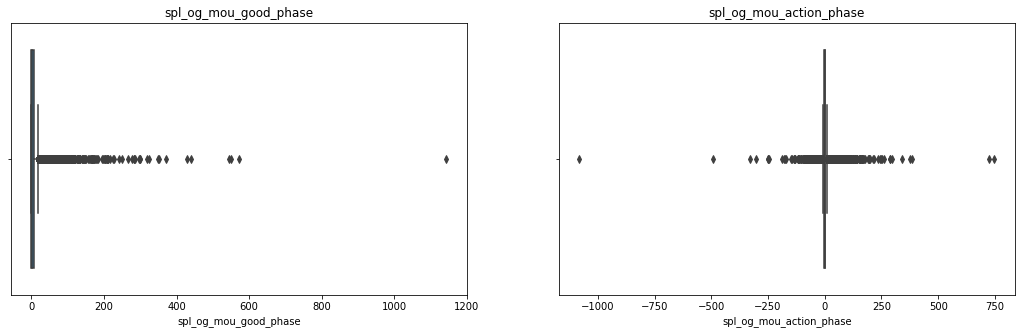

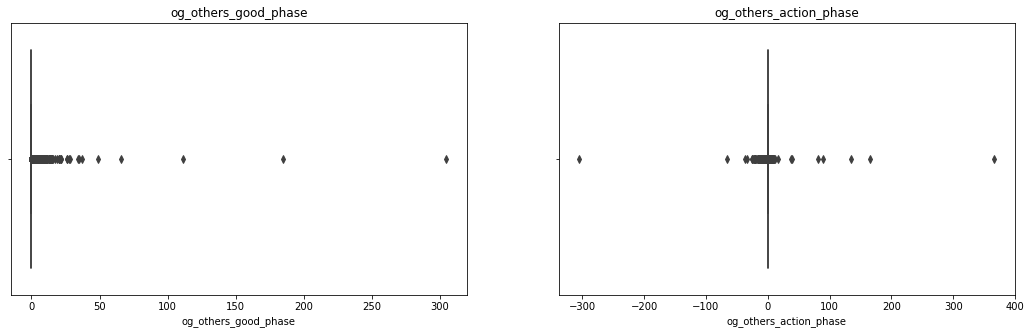

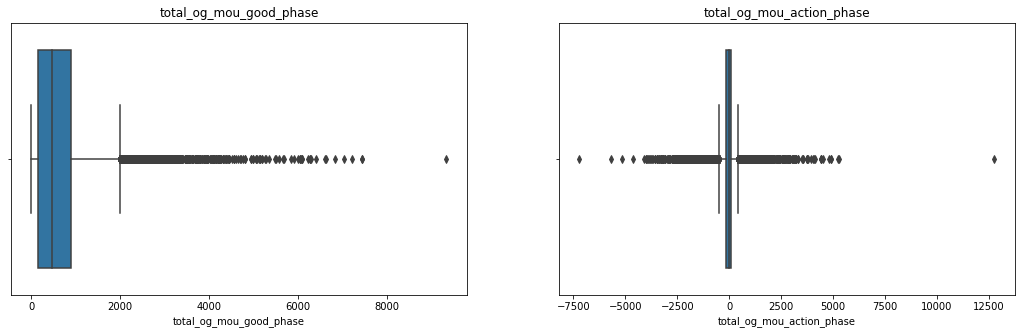

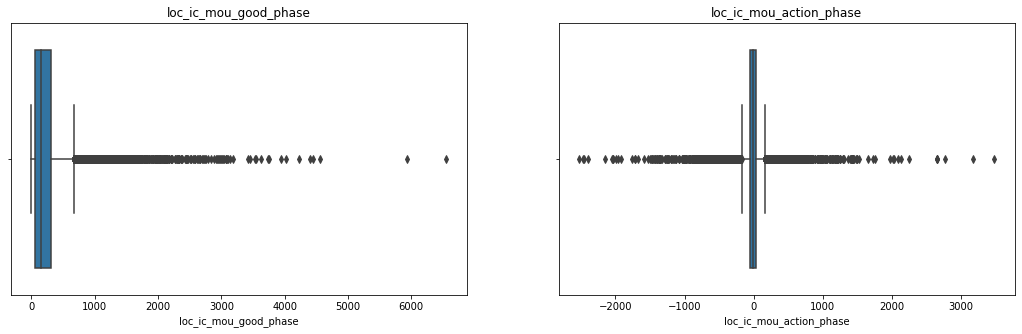

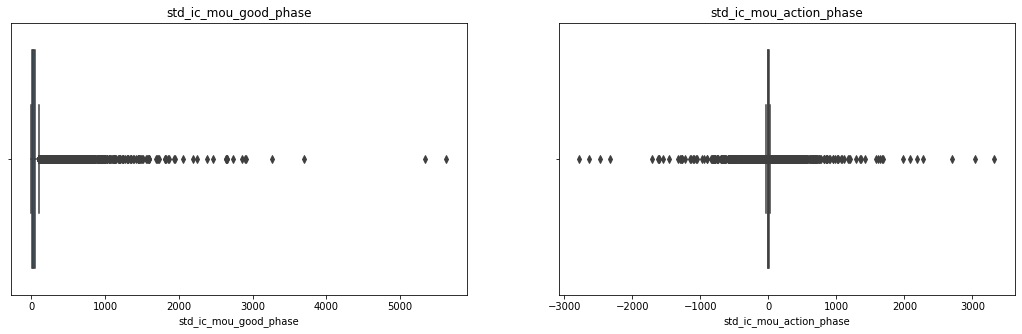

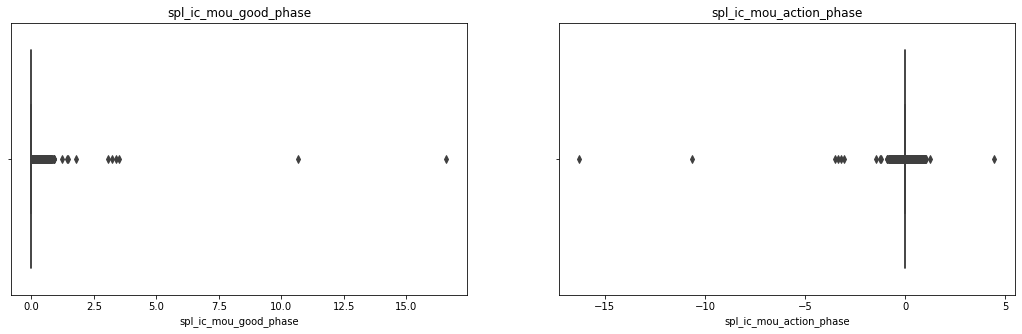

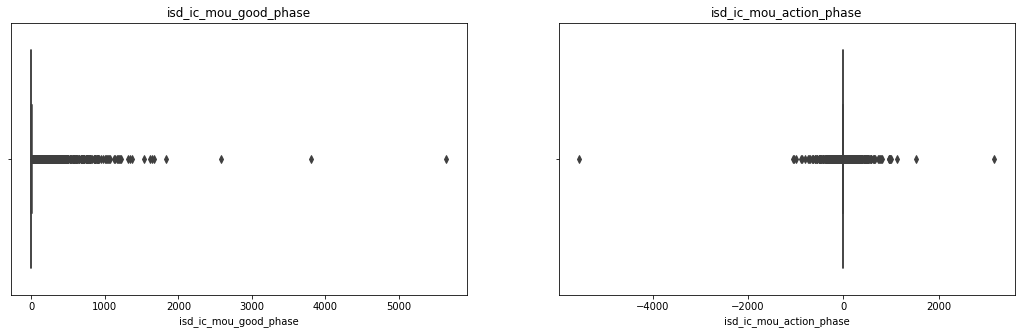

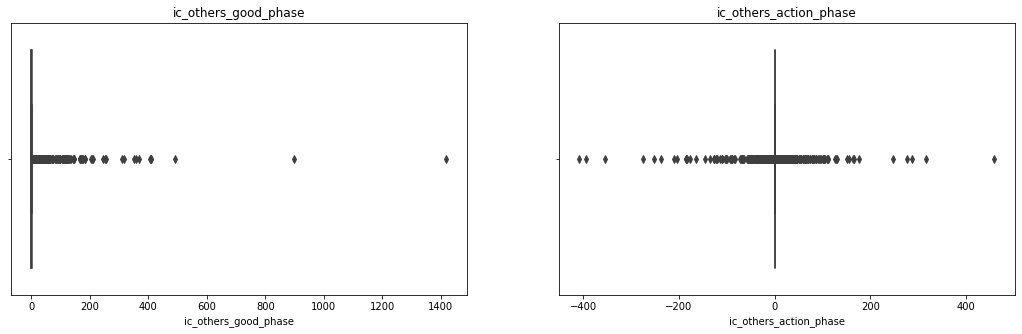

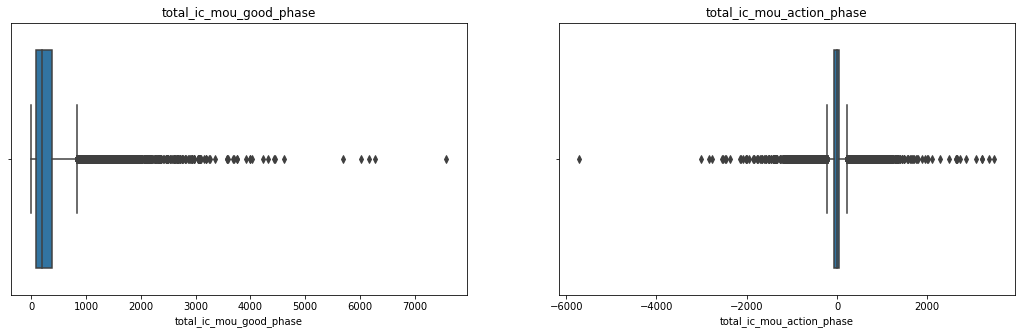

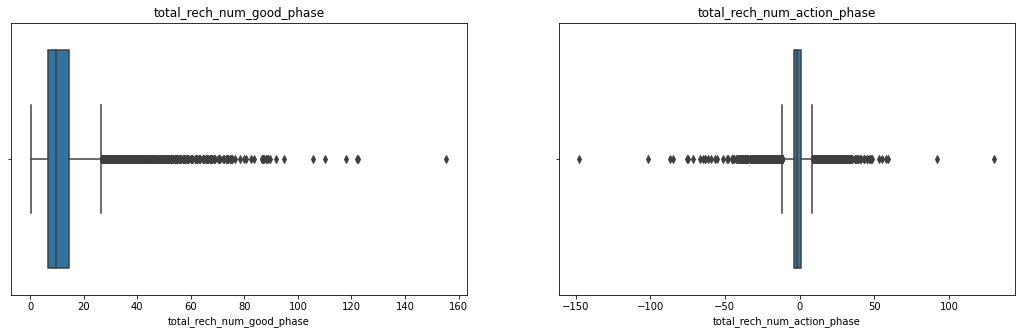

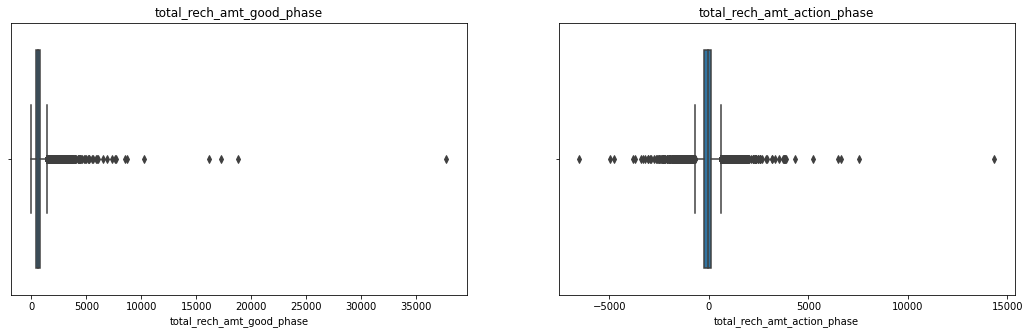

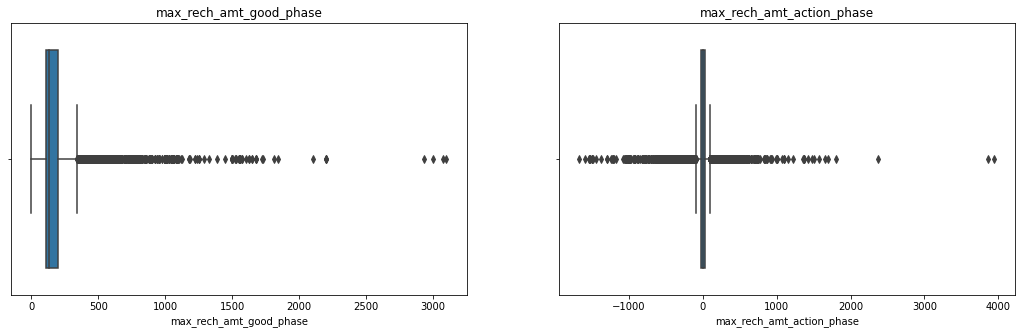

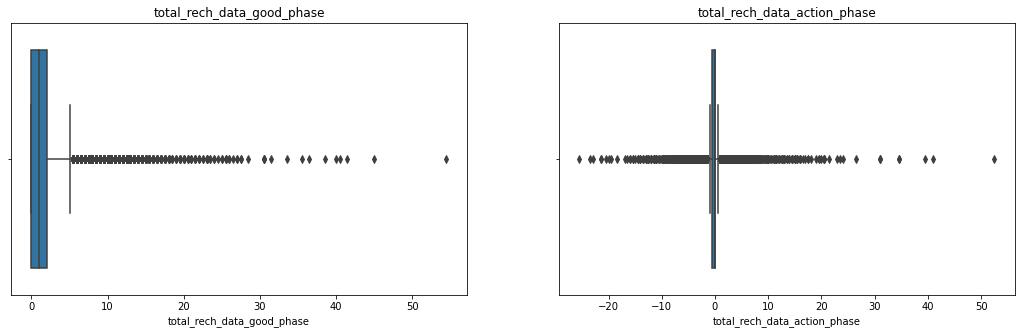

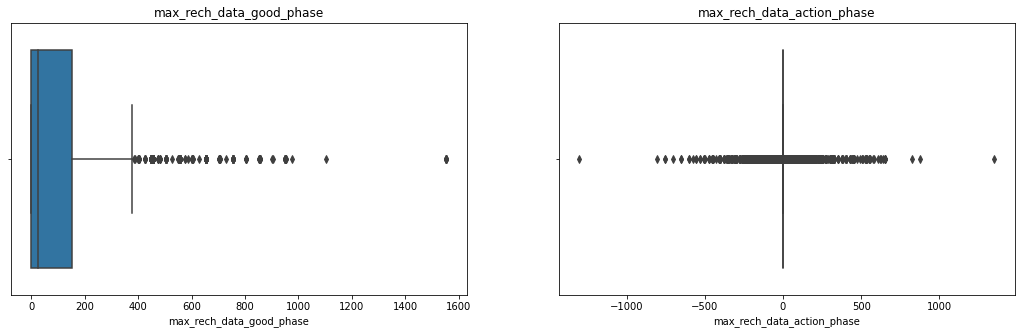

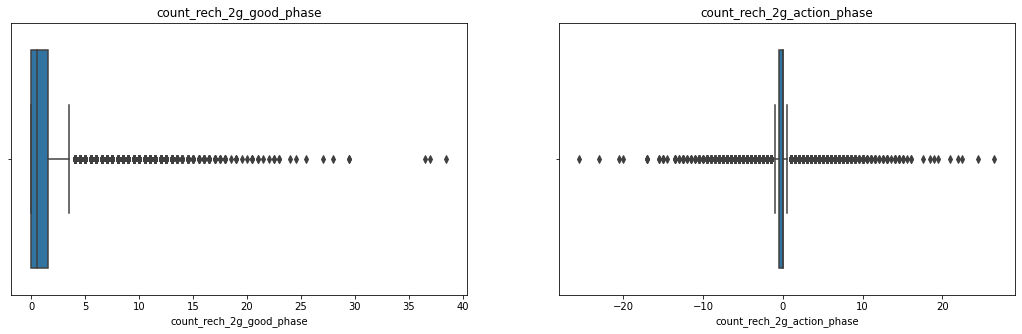

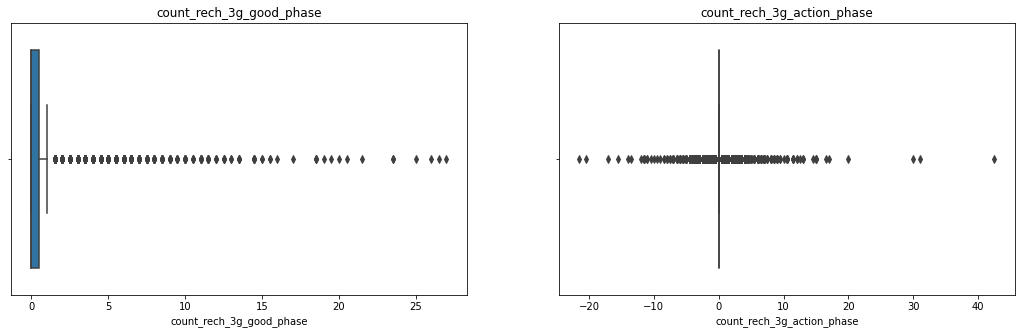

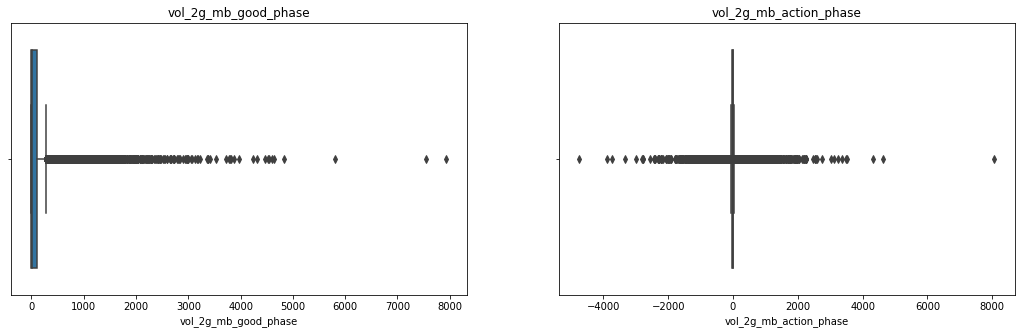

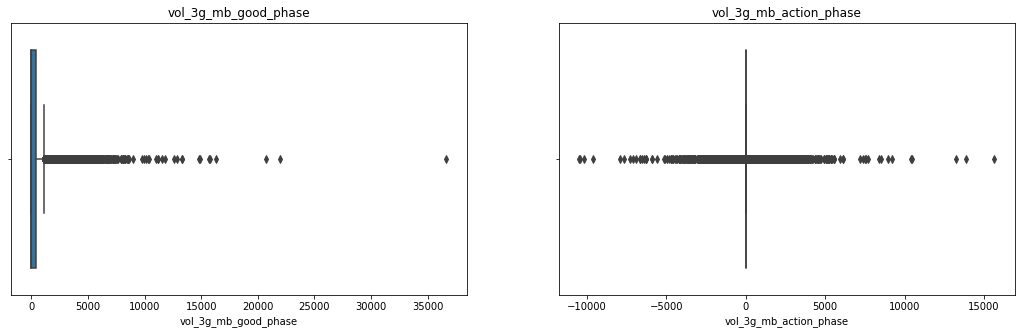

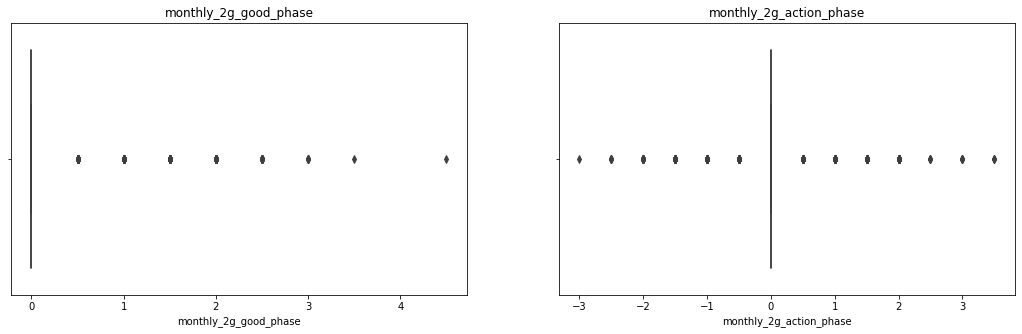

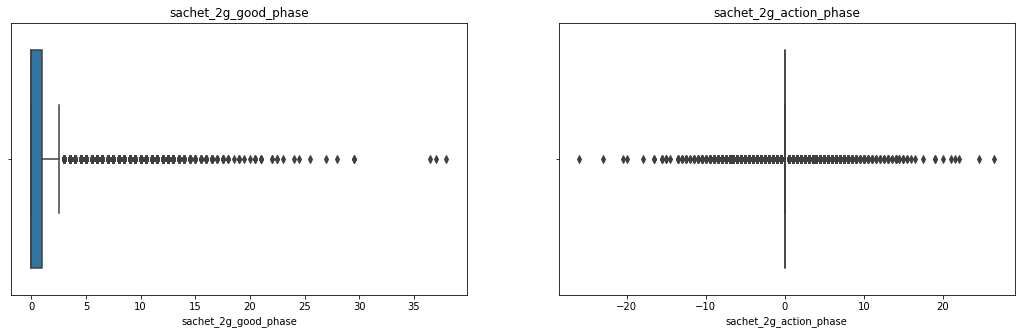

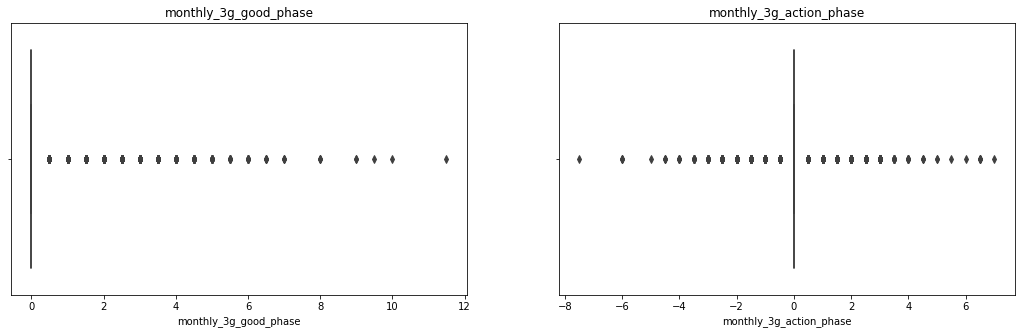

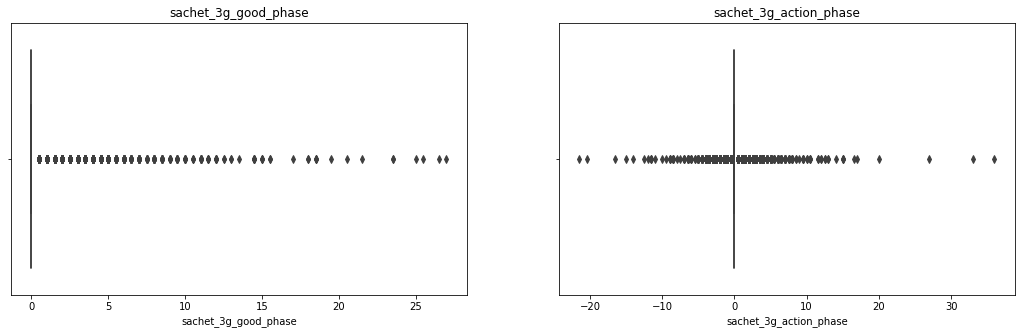

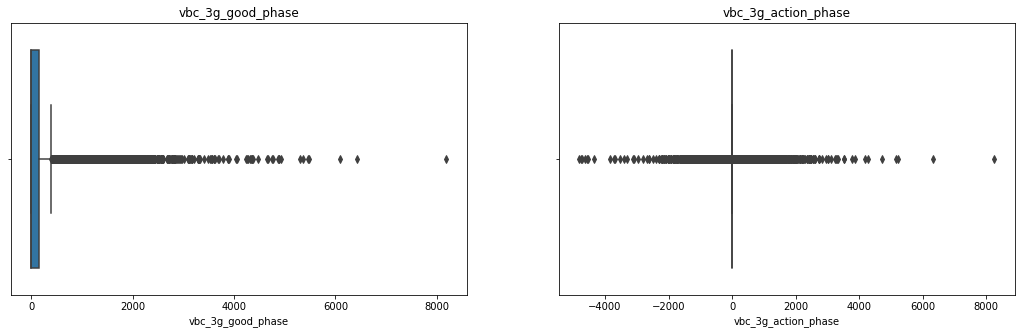

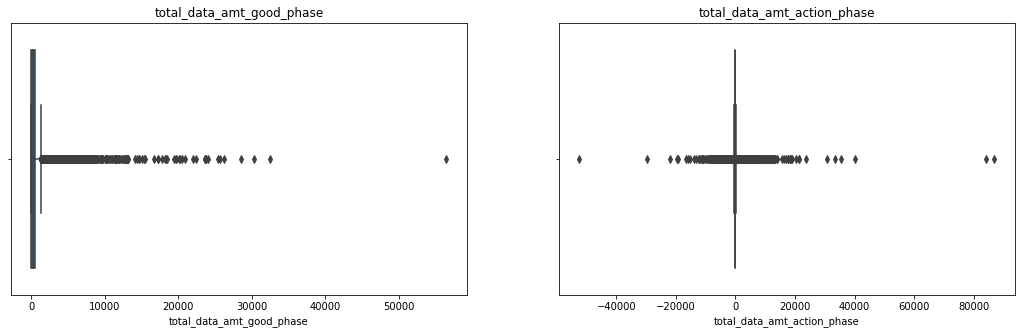

In [56]:
# Identifying Outliers
for i , j in zip (Good_nume_var, Act_NUM_var) :
    plt.figure(figsize=[18,5])
    plt.subplot(1,2,1)
    sns.boxplot(tcd[i])
    plt.title(i)
    plt.subplot(1,2,2)
    sns.boxplot(tcd[j])
    plt.title(j)
    plt.show()




## Huge outliers are clearly visible

#### We will handle it later lets first split the data in train and test

# 4. Data Preperation
## splitting the data

In [57]:
X_df = tcd.drop('churn', axis=1)
y_df = tcd['churn']
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, train_size=0.7, random_state=100)

## Handeling Outliers and Rescalling

In [58]:
# Applying Robustscaler 
# Normalizing the data
rob = RobustScaler()
X_train = pd.DataFrame(data = rob.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data= rob.fit_transform(X_test), columns=X_test.columns , index=X_test.index )


In [59]:
# Re-Scalling
scalar = MinMaxScaler()
X_train[:] = scalar.fit_transform(X_train[:])
X_test[:] = scalar.transform(X_test[:])

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19987, 71)
(8566, 71)
(19987,)
(8566,)


In [61]:
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_amt_good_phase,total_data_amt_action_phase
21798,0.0,0.0,0.0,1.0,0.0,1.0,0.287129,0.009881,0.263766,0.041375,0.372152,0.026054,0.278192,0.000000,0.357573,0.000000,0.324942,0.007059,0.460599,0.053277,0.265047,0.0,0.399453,0.001433,0.590463,0.000000,0.134454,0.055626,0.286929,0.009824,0.418321,0.020991,0.418468,0.000000,0.942130,0.000045,0.783360,0.000000,0.470583,0.024128,0.614812,0.061475,0.398618,0.009970,0.313910,0.035484,0.419243,0.044444,0.296053,0.008039,0.603302,0.067797,0.444444,0.000000,0.325397,0.002899,0.324920,0.000000,0.399638,0.0,0.461538,0.067797,0.444444,0.000000,0.517241,0.000000,0.362832,0.000000,0.365033,0.003541,0.375034
22166,0.0,0.0,0.0,1.0,0.0,1.0,0.193190,0.050435,0.223188,0.143663,0.296515,0.136364,0.242045,0.027509,0.334361,0.113205,0.267952,0.062365,0.444392,0.171163,0.207112,0.0,0.399453,0.002241,0.589958,0.000000,0.134454,0.206366,0.223042,0.054994,0.415457,0.058504,0.398103,0.000000,0.942130,0.000000,0.783397,0.000000,0.470583,0.091033,0.600145,0.106557,0.364055,0.050698,0.275448,0.083710,0.436433,0.022222,0.322368,0.081029,0.655354,0.000000,0.484848,0.037037,0.325397,0.004464,0.321714,0.020663,0.389668,0.0,0.461538,0.000000,0.484848,0.086957,0.517241,0.000000,0.362832,0.139767,0.299557,0.008924,0.376650
7798,0.0,0.0,0.0,0.0,0.0,0.0,0.065926,0.032438,0.269767,0.005800,0.382171,0.312397,0.268504,0.000000,0.357573,0.006114,0.321864,0.012328,0.454813,0.286589,0.264985,0.0,0.399453,0.019292,0.588599,0.006862,0.127823,0.282716,0.283864,0.019375,0.419974,0.005142,0.433751,0.004515,0.937789,0.000000,0.783397,0.000083,0.470496,0.020601,0.625529,0.163934,0.382488,0.035909,0.308659,0.038710,0.421717,0.000000,0.309211,0.000000,0.597569,0.000000,0.464646,0.000000,0.325397,0.000000,0.324535,0.000000,0.399638,0.0,0.461538,0.000000,0.464646,0.000000,0.517241,0.000000,0.362832,0.000000,0.365033,0.000000,0.376291
13289,0.0,1.0,0.0,1.0,1.0,0.0,0.040811,0.017375,0.233336,0.001416,0.377614,0.082991,0.241641,0.000000,0.357573,0.000000,0.324942,0.001612,0.455459,0.075093,0.235515,0.0,0.399453,0.023263,0.578053,0.001783,0.132731,0.075170,0.254582,0.005703,0.415455,0.003017,0.423619,0.000000,0.942130,0.000000,0.783397,0.000000,0.470583,0.007175,0.616213,0.143443,0.320276,0.017345,0.280651,0.035484,0.387089,0.133333,0.230263,0.031511,0.575097,0.152542,0.373737,0.055556,0.301587,0.000137,0.324449,0.028232,0.359916,0.0,0.461538,0.152542,0.373737,0.000000,0.517241,0.055556,0.336283,0.009401,0.360628,0.02183

In [62]:
# Balancing the data
sampling = SMOTE(random_state = 100)
X_train_smo, y_train_smo = sampling.fit_resample(X_train, y_train)

In [63]:
# Size of data
print(X_train_smo.shape)
print(y_train_smo.shape)

(37696, 71)
(37696,)


<AxesSubplot:xlabel='churn', ylabel='Density'>

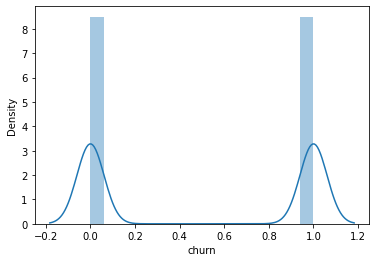

In [64]:
# Churn ratio after resampeling
sns.distplot(y_train_smo)

### Data is now balanced

<AxesSubplot:>

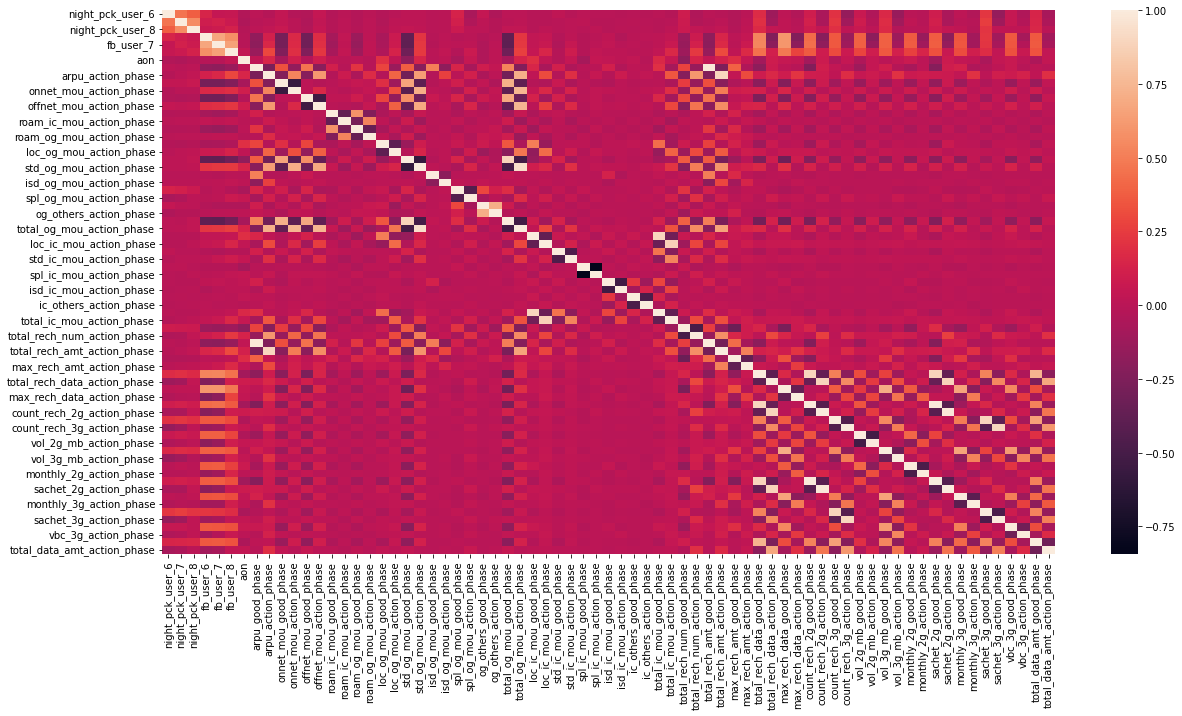

In [65]:
plt.figure(figsize=[20,10])
sns.heatmap(X_train_smo.corr())

In [66]:
# Removing Highly correlated factors
# Create correlation matrix
corr_matrix = X_train_smo.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
X_train_smo.drop(to_drop, axis=1, inplace=True)

# 5. Model Building and Evaluation 

## Logistic Regression

In [67]:
logm1 = sm.GLM(y_train_smo,(sm.add_constant(X_train_smo)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37696
Model:                            GLM   Df Residuals:                    37639
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16200.
Date:                Mon, 06 Sep 2021   Deviance:                       32399.
Time:                        19:43:09   Pearson chi2:                 1.41e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          140.0607      5.339     26.234      0.000     129.597     150.525
night_pck_user_6                 0.4905      0.131      3.749      0.000       0.234       0.747
night_pck_user_7                -0.0879      0.168     -0.525      0.600      -0.416       0.240
night_pck_user_8                 0.3972      0.196      2.030      0.042       0.014       0.781
fb_user_6                       -0.1294      0.049     -2.662      0.008      -0.225      -0.034
fb_user_7                        0.3355      0.053      6.362      0.000       0.232       0.439
fb_user_8                       -0.1192      0.064     -1.864      0.062      -0.245       0.006
aon                             -1.0765      0.071    -15.071      0.000      -1.217      -0.937
arpu_good_phase                 -1.3042      2.453     -0.532      0.595      -6.112       3.503
arpu_action_phase               -6.2856      1.837     -3.422      0.001      -9.885      -2.686
onnet_mou_good_phase           -32.5631     16.971     -1.919      0.055     -65.826       0.700
onnet_mou_action_phase         -10.5267      0.795    -13.248      0.000     -12.084      -8.969
offnet_mou_good_phase          -36.2254     19.237     -1.883      0.060     -73.930       1.479
offnet_mou_action_phase        -18.6385      1.479    -12.604      0.000     -21.537     -15.740
roam_ic_mou_good_phase           2.4165      0.951      2.542      0.011       0.553       4.280
roam_ic_mou_action_phase        -0.8506      0.894     -0.952      0.341      -2.602       0.901
roam_og_mou_good_phase          15.0470      5.313      2.832      0.005       4.634      25.460
roam_og_mou_action_phase         9.5926      0.917     10.465      0.000       7.796      11.389
loc_og_mou_good_phase           16.7176     15.273      1.095      0.274     -13.216      46.651
loc_og_mou_action_phase        -10.0575      1.458     -6.897      0.000     -12.916      -7.199
std_og_mou_good_phase           36.2046     20.506      1.766      0.077      -3.987      76.397
isd_og_mou_good_phase           25.9387     13.446      1.929      0.054      -0.415      52.292
isd_og_mou_action_phase         -0.0926      1.476     -0.063      0.950      -2.985       2.799
spl_og_mou_good_phase            2.1005      2.702      0.777      0.437      -3.195       7.396
spl_og_mou_action_phase         -5.0297      2.110     -2.384      0.017      -9.165      -0.895
og_others_good_phase            -1.1278      1.063     -1.061      0.289      -3.212       0.956
loc_ic_mou_good_phase          -26.7998      0.997    -26.887      0.000     -28.753     -24.846
loc_ic_mou_action_phase        -41.8553      1.390    -30.102      0.000     -44.580     -39.130
std_ic_mou_good_phase          -10.7663      1.229     -8.762      0.000    

### Applying RFE

In [68]:
logreg = LogisticRegression()
# running RFE with 20 variables as output
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_train_smo, y_train_smo)

In [69]:
rfe_columns=X_train_smo.columns[rfe.support_]

In [70]:
X_train_SM = sm.add_constant(X_train_smo[rfe_columns])
logm = sm.GLM(y_train_smo,X_train_SM, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37696
Model:                            GLM   Df Residuals:                    37685
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17741.
Date:                Mon, 06 Sep 2021   Deviance:                       35482.
Time:                        19:43:32   Pearson chi2:                 1.18e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           47.6328      0.636     74.841      0.000      46.385      48.880
arpu_action_phase              -15.1325      1.366    -11.080      0.000     -17.809     -12.456
onnet_mou_action_phase          -6.7334      0.612    -11.004      0.000      -7.933      -5.534
offnet_mou_action_phase        -12.6053      1.099    -11.467      0.000     -14.760     -10.451
loc_og_mou_good_phase          -11.5597      0.725    -15.946      0.000     -12.981     -10.139
loc_og_mou_action_phase        -13.1127      1.402     -9.352      0.000     -15.861     -10.364
loc_ic_mou_good_phase          -35.7022      1.021    -34.979      0.000     -37.703     -33.702
loc_ic_mou_action_phase        -52.0622      1.389    -37.479      0.000     -54.785     -49.340
total_rech_num_action_phase     -4.1491      0.641     -6.470      0.000      -5.406      -2.892
total_rech_data_good_phase     -11.4743      0.385    -29.792      0.000     -12.229     -10.719
total_rech_data_action_phase   -24.5228      0.895    -27.413      0.000     -26.276     -22.769
================================================================================================
"""

In [71]:
# Geerating Prediction table
y_train_pred = res.predict(X_train_SM)
y_train_pred = y_train_pred.values.reshape(-1)


In [72]:
y_train_firnal_pred = pd.DataFrame({'Churn':y_train_smo.values, 'Churn_Prob':y_train_pred})
y_train_firnal_pred.head()

,Churn,Churn_Prob
0,0,0.488560
1,0,0.353410
2,0,0.440348
3,1,0.898790
4,0,0.193286


In [73]:
# Deriving prediction with different cutt off points
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_firnal_pred[i]= y_train_firnal_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_firnal_pred.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.488560,1,1,1,1,1,0,0,0,0,0
1,0,0.353410,1,1,1,1,0,0,0,0,0,0
2,0,0.440348,1,1,1,1,1,0,0,0,0,0
3,1,0.898790,1,1,1,1,1,1,1,1,1,0
4,0,0.193286,1,1,0,0,0,0,0,0,0,0


In [74]:
# accuracy sensitivity and specificity for various cuttoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_firnal_pred.Churn, y_train_firnal_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.638237  0.978406  0.298069
0.2   0.2  0.694079  0.954796  0.433362
0.3   0.3  0.734640  0.926730  0.542551
0.4   0.4  0.765996  0.883913  0.648079
0.5   0.5  0.786370  0.825605  0.747135
0.6   0.6  0.789633  0.732545  0.846721
0.7   0.7  0.754987  0.589718  0.920257
0.8   0.8  0.677552  0.395055  0.960049
0.9   0.9  0.568495  0.150944  0.986046


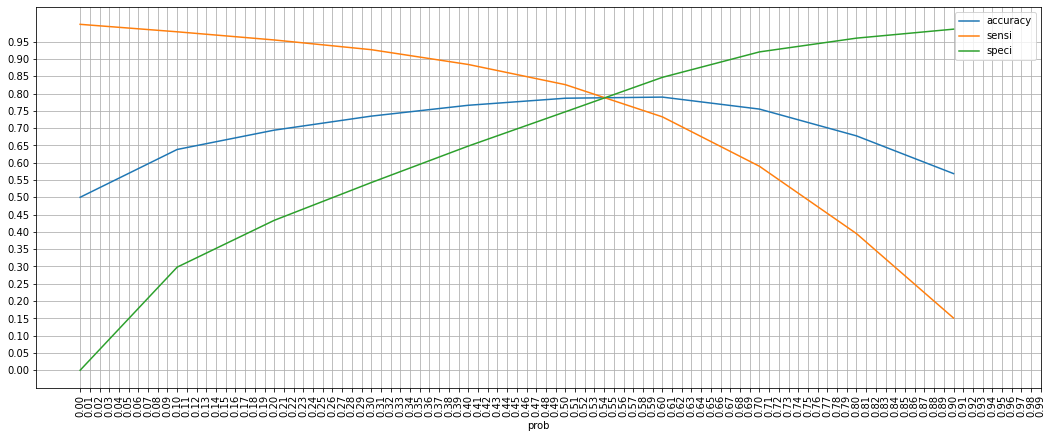

In [75]:
# Plot accuracy sensitivity and specificity for various cuttof 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=[18,7])
plt.xticks(np.arange(0,1,0.01), rotation=90)
plt.yticks(np.arange(0,1,0.05))
plt.grid()
plt.show()

## We can see, 0.54 is the optimum point to take it as a cutoff probability.


In [76]:
# predicting
y_train_firnal_pred['Churn_pred'] = y_train_firnal_pred.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_train_firnal_pred.head()


,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Churn_pred
0,0,0.488560,1,1,1,1,1,0,0,0,0,0,0
1,0,0.353410,1,1,1,1,0,0,0,0,0,0,0
2,0,0.440348,1,1,1,1,1,0,0,0,0,0,0
3,1,0.898790,1,1,1,1,1,1,1,1,1,0,1
4,0,0.193286,1,1,0,0,0,0,0,0,0,0,0


### <b>Evaluating the model</b>
### Evaluating on train data


In [77]:
confusion = metrics.confusion_matrix(y_train_firnal_pred.Churn, y_train_firnal_pred.Churn_pred )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)
print('sensitivity :', (TP / float(TP+FN)))
print('Specificity : ', TN/(TN+FP))
print('Predictive Positive Value :', (TP / float(TP+FP)))
print('Negative Predictive Value : ', (TN / float(TN+ FN)))

[[14817  4031]
 [ 3830 15018]]
sensitivity : 0.796795415959253
Specificity :  0.786131154499151
Predictive Positive Value : 0.7883878418814636
Negative Predictive Value :  0.7946050302997801


In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


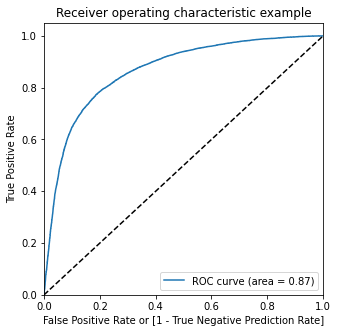

In [79]:
# Plotting the curve for the obtained metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_firnal_pred.Churn, y_train_firnal_pred.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_firnal_pred.Churn, y_train_firnal_pred.Churn_Prob )

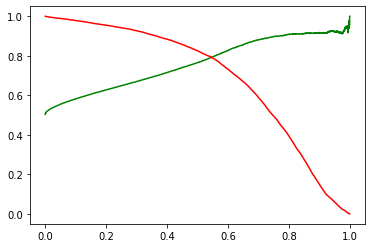

In [80]:
# plotting the precoion and recall curve
p, r, thresholds = precision_recall_curve(y_train_firnal_pred.Churn, y_train_firnal_pred.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Evaluating on test data


In [81]:
# As we have already rescalled the X_test, we wil drag out the features used in model
X_test_rfe=X_test[rfe_columns]
X_test_rfe.head()

,arpu_action_phase,onnet_mou_action_phase,offnet_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,total_rech_num_action_phase,total_rech_data_good_phase,total_rech_data_action_phase
10982,0.273392,0.381169,0.280557,0.037288,0.460073,0.067308,0.434113,0.394009,0.000000,0.309211
19734,0.270003,0.377447,0.280612,0.019319,0.463056,0.047935,0.426116,0.398618,0.022222,0.309211
9596,0.265064,0.380367,0.268676,0.088271,0.442774,0.167868,0.409864,0.382488,0.033333,0.315789
26604,0.258352,0.385444,0.264403,0.089084,0.463251,0.053844,0.403620,0.396313,0.011111,0.328947
633,0.259027,0.378538,0.274353,0.000561,0.455566,0.013201,0.411990,0.417051,0.033333,0.368421


In [82]:
X_test_SM = sm.add_constant(X_test_rfe)

In [83]:
y_test_pred = res.predict(X_test_SM)


In [84]:
y_test_firnal_pred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_firnal_pred.head()

,Churn,Churn_Prob
10982,0,0.035828
19734,0,0.098466
9596,0,0.002030
26604,0,0.110726
633,0,0.207155


In [85]:
y_test_firnal_pred['Churn_pred'] = y_test_firnal_pred.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_test_firnal_pred.head()

,Churn,Churn_Prob,Churn_pred
10982,0,0.035828,0
19734,0,0.098466,0
9596,0,0.002030,0
26604,0,0.110726,0
633,0,0.207155,0


In [86]:
confusion = metrics.confusion_matrix(y_test_firnal_pred.Churn, y_test_firnal_pred.Churn_pred )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)
print('sensitivity :', (TP / float(TP+FN)))
print('Specificity : ', TN/(TN+FP))
print('Predictive Positive Value :', (TP / float(TP+FP)))
print('Negative Predictive Value : ', (TN / float(TN+ FN)))

[[6400 1658]
 [ 132  376]]
sensitivity : 0.7401574803149606
Specificity :  0.7942417473318442
Predictive Positive Value : 0.1848574237954769
Negative Predictive Value :  0.9797917942437232


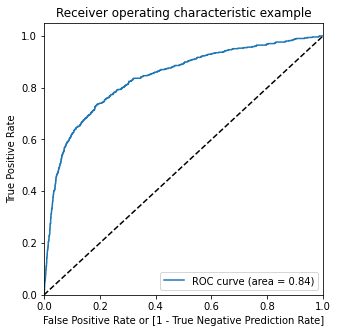

In [87]:
# Plotting the curve for the test
fpr, tpr, thresholds = metrics.roc_curve(y_test_firnal_pred.Churn, y_test_firnal_pred.Churn_Prob, drop_intermediate = False )
draw_roc(y_test_firnal_pred.Churn, y_test_firnal_pred.Churn_Prob )

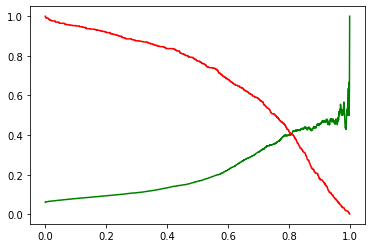

In [88]:
# plotting the precoion and recall curve
p, r, thresholds = precision_recall_curve(y_test_firnal_pred.Churn, y_test_firnal_pred.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# <b>Logistic Regression By using PCA</b>

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, train_size=0.7, random_state=1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# scaling dataset
scaler = MinMaxScaler()
X_train[:] = scaler.fit_transform(X_train[:])
X_test[:] = scaler.transform(X_test[:])
# Applying SMOTE - imbalance correction
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("X_train_sm Shape:", X_train_sm.shape)
print("y_train_sm Shape:", y_train_sm.shape)

X_train shape: (19987, 71)
X_test shape: (8566, 71)
X_train_sm Shape: (37662, 71)
y_train_sm Shape: (37662,)


In [90]:
# Applying PCA
pca = PCA(random_state=85)
pca.fit(X_train_sm)

PCA(random_state=85)

In [91]:
# Fitting and transforming
X_train_sm_pca=pca.fit_transform(X_train_sm)
X_test_pca=pca.transform(X_test)

In [92]:
pca.components_

array([[ 1.32605576e-02,  1.36186320e-02,  1.15003823e-02, ...,
        -7.87537556e-04,  1.04466581e-02, -7.84527300e-04],
       [-1.96189221e-02, -4.88613878e-03,  1.88385321e-02, ...,
         1.06055399e-02, -7.57555209e-04,  4.00301774e-03],
       [ 1.74130026e-02, -1.30549086e-02,  4.61776132e-03, ...,
        -9.00127933e-04,  1.96191854e-04,  1.71812275e-03],
       ...,
       [ 0.00000000e+00,  1.11771376e-16, -1.24978393e-16, ...,
        -8.78946728e-17, -1.96359679e-16, -2.21805630e-16],
       [-0.00000000e+00,  2.83599857e-17, -4.42453187e-17, ...,
         8.55895712e-17, -3.48771137e-16, -2.04438921e-16],
       [-0.00000000e+00, -1.18733277e-16,  2.32290174e-16, ...,
         1.95880364e-18,  1.54185302e-16, -1.30473052e-16]])

In [93]:
# Applying Log regression
lr_pca = LogisticRegression()
lr_pca.fit(X_train_sm_pca, y_train_sm)
# making the predictions
y_pred_pca = lr_pca.predict(X_test_pca)
# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred_pca)

### <b>Evaluating the model</b>

In [94]:
confusion_matrix(y_test,y_pred_pca)

array([[6465, 1610],
       [ 114,  377]], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred_pca)

0.7987392014942797

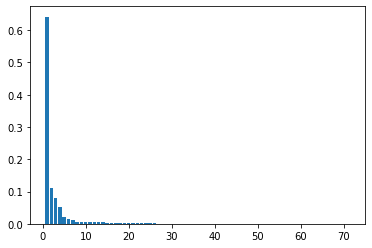

In [96]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

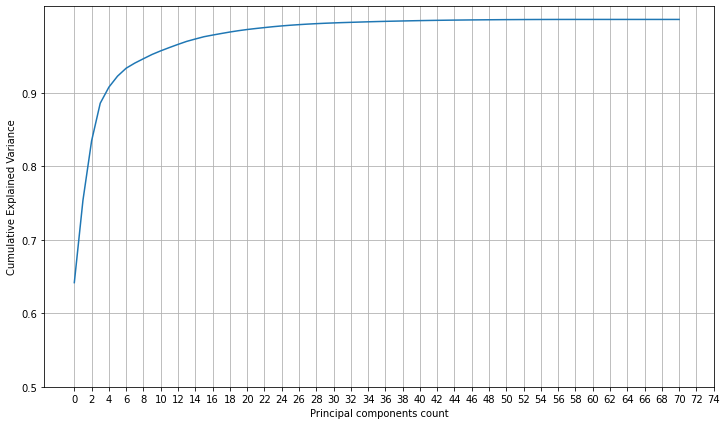

In [97]:
# Getting the components
# plotting explained variance ratio
cum_var = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,7])
plt.plot(cum_var)
plt.xlabel('Principal components count')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0,75,2))
plt.yticks(np.arange(0.5,1,0.1))
plt.grid()
plt.show()

### > 90% of the data can be explained with 5 PCA components*

In [98]:
# Apply 5 PCA components
pca_final = IncrementalPCA(n_components=5)
train_pca_final = pca_final.fit_transform(X_train_sm)
test_pca_final = pca_final.transform(X_test)

In [99]:
# Applying logistic Regression
logreg_pca_final = LogisticRegression()
logreg_pca_final.fit(train_pca_final, y_train_sm)
# predictions
y_pred_final = logreg_pca_final.predict(test_pca_final)
# prediction into a dataframe
y_pred_final = pd.DataFrame(y_pred_final)

### <b>Evaluating the model</b>

In [100]:
print( confusion_matrix(y_test,y_pred_final) )
print('Accuracy :', accuracy_score(y_test,y_pred_final) )

[[5095 2980]
 [ 157  334]]
Accuracy : 0.6337847303292085


# <b>Decision Tree</b>

In [101]:
# splitting the data
X = tcd.drop('churn', axis=1)
y = tcd['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [102]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

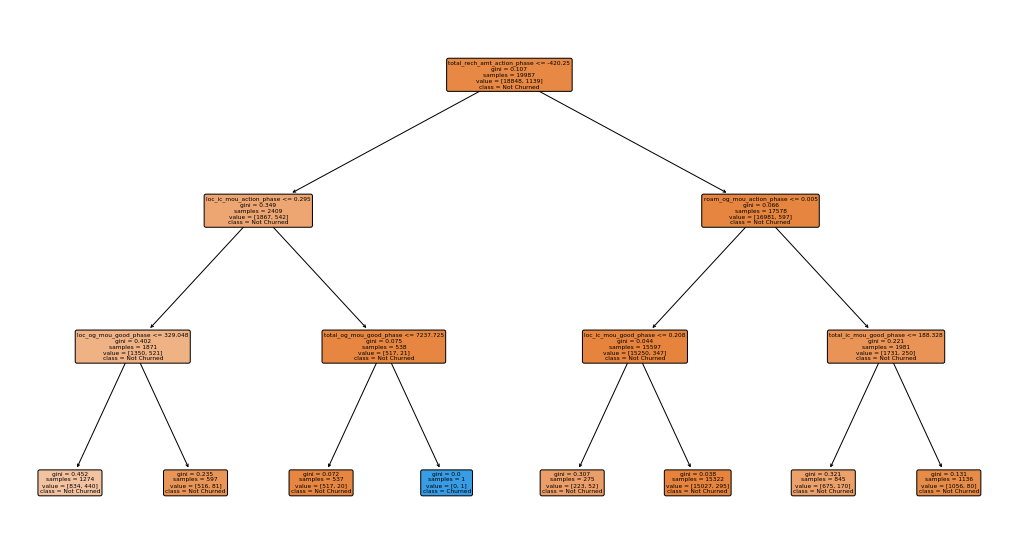

In [103]:
plt.figure(figsize=[18,10])
plot_tree(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'])
plt.show()

### <b>Evaluating the model</b>

In [104]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [105]:
print('Train Accuracy :', accuracy_score(y_train, y_train_pred))
print('Test Accuracy : ', accuracy_score(y_test, y_test_pred))

Train Accuracy : 0.9430629909441137
Test Accuracy :  0.9406957739901938


In [106]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train, y_train_pred))


Train Confusion Matrix
[[18848     0]
 [ 1138     1]]


In [107]:
print('Test Confusion Matrix')

print(confusion_matrix(y_test, y_test_pred))

Test Confusion Matrix
[[8058    0]
 [ 508    0]]


# <b>Random Forest</b>


In [108]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [109]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

### <b>Evaluating the model</b>

In [110]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [111]:
r2_score(y_train, y_train_pred)

0.25873116064076995

In [112]:
r2_score(y_test, y_test_pred)

0.19659953188910229

In [113]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92422657e-04,
       1.08035538e-03, 3.89956645e-02, 1.83315508e-02, 8.17457836e-03,
       1.44940553e-01, 2.31552856e-03, 6.08615374e-03, 1.93834120e-03,
       8.23936385e-03, 1.14526725e-02, 2.40802257e-02, 1.23925638e-02,
       7.83037766e-02, 5.46130733e-02, 5.20959710e-03, 8.41584705e-03,
       3.30221109e-02, 2.70435996e-04, 7.55591948e-04, 1.46393432e-03,
       3.37768629e-03, 4.80793940e-04, 1.43141282e-04, 5.94239941e-03,
       1.12400394e-02, 5.16447305e-02, 7.70949473e-02, 1.21483591e-03,
       1.39042736e-02, 5.86543094e-04, 2.01241977e-03, 3.71238923e-04,
       1.67158561e-03, 6.26151531e-04, 1.36239068e-03, 3.37483380e-02,
       4.77931582e-02, 3.33060152e-03, 1.18833798e-02, 1.45870388e-02,
       1.99985668e-01, 1.55452908e-02, 1.03451858e-02, 4.30228749e-04,
       3.51108787e-03, 8.33708603e-03, 2.13964456e-03, 2.13256508e-04,
       6.51472681e-04, 1.12710744e-04, 2.21473160e-04, 2.16250038e-03,
      

In [114]:
feature_df = pd.DataFrame({
    "Var_name": X_train.columns,
    "Imp": rf.feature_importances_})

In [115]:
feature_df.sort_values(by="Imp", ascending=False).head(10)

,Var_name,Imp
44,total_rech_amt_action_phase,0.199986
8,arpu_action_phase,0.144941
16,roam_og_mou_action_phase,0.078304
30,loc_ic_mou_action_phase,0.077095
17,loc_og_mou_good_phase,0.054613
29,loc_ic_mou_good_phase,0.051645
40,total_ic_mou_action_phase,0.047793
5,fb_user_8,0.038996
39,total_ic_mou_good_phase,0.033748
20,std_og_mou_action_phase,0.033022


# 6. Summary

## MOdels Applied
* Logistic Regression (with RFE)
* Logistic Regression (With PCA)
* Decision Tree Model
* Random Forest Model

## Logistic Regression Evaluation Sheet
* On Train Data

>* sensitivity : 0.797
>* Specificity :  0.786
>* ROC Curve are : 0.87

* On Test Data

>* sensitivity : 0.740
>* Specificity :  0.794
>* ROC Curve area : 0.84

## Logistic Regression with PCA Evaluation Sheet
* PCA Accuracy Score : 0.799
* 5 PCA components explained 90%
* IncrementalPCA Accuracy Score with 5 PCA :  0.634

## Decision Tree
* Train Accuracy : 0.943
* Test Accuracy :  0.941

## Random Forest
* R<sup>2</sup> Train : 0.26
* R<sup>2</sup> Test : 0.2


# 7. Conclusion and Suggestion

* Among all the models Decision tree is able to give 94% of accuracy while Sensitivity and Specifiicty of Logistic Regression also is about 80% so these models can be a good choice. 
* There is nothing wrong to get in touch with cutomers who are marked Falsely Churned it will ensure their loyality and hold them on network. 

### From Analysis we found that following features can be good indication to flag Churning customers
* aon
* loc_ic_mou_action_phase
* arpu_action_phase
* std_ic_mou_action_phase
* max_rech_amt_action_phase
* loc_ic_mou_good_phase
* total_ic_mou_good_phase

> Here good phase explains 6th and 7th month while action phase is 8th Month.